# Import Data

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [101]:
pwd

'/content'

In [102]:
# df = pd.read_csv("data.csv")
df = pd.read_csv('https://raw.githubusercontent.com/pypluf/MFVAMA/main/breast_cancer.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [103]:
df['diagnosis'] = df['diagnosis'].map({'B': -1, 'M': 1})
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [105]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [106]:
# Chia ra tập training và tập testing
#X = df.drop(['diagnosis'], axis=1)
#  X = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]
X = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',
        'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se',
        'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]
y = df['diagnosis']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [107]:
from sklearn.preprocessing import StandardScaler
# Chuẩn hóa dữ liệu
sc = StandardScaler()

X_std = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [108]:
X_train.shape

(398, 30)

In [109]:
pd.array([X_std])

<PandasArray>
[array([[-0.12348985, -0.29680142, -0.17050713, ..., -0.84082156,
        -0.8563616 , -0.76574773],
       [-0.22826757, -0.65795149, -0.25377521, ..., -0.37706655,
        -1.3415819 , -0.41480748],
       [ 0.14553402, -1.23056444,  0.24583328, ..., -0.04762652,
        -0.08997059,  0.4882635 ],
       ...,
       [ 0.03226081, -0.55578404, -0.08064356, ..., -1.26179013,
        -0.6828391 , -1.27672587],
       [-0.05552593,  0.10949242, -0.04684166, ...,  1.07924018,
         0.4755842 ,  1.25530227],
       [-0.56525537,  0.32333128, -0.619825  , ..., -0.61952313,
        -0.30366032, -0.84348042]])]
Length: 1, dtype: object

# PCA

In [110]:
from sklearn.decomposition import PCA
import time

start = time.time()

pca = PCA(n_components = 3)

X_train_pca = pca.fit_transform(X_std)
X_test_pca = pca.fit_transform(X_test)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.009842395782470703 seconds


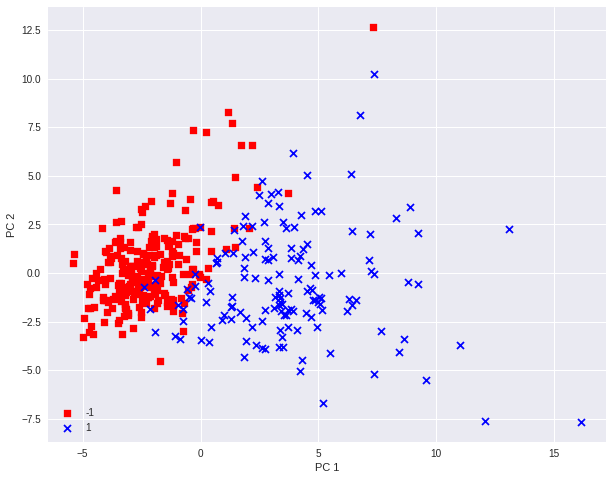

In [111]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

fig, ax = plt.subplots(figsize = (10, 8))

for l, c, m in zip(np.unique(y_train), colors, markers):
    ax.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c = c, label = l, marker = m)
ax.set(xlabel = 'PC 1', ylabel = 'PC 2')
plt.legend(loc='lower left')
plt.show()

In [112]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47565014, 0.64859045, 0.73441453])

# LDA

In [113]:
X_train_lda = np.array(X_std)
X_test_lda = np.array(X_test)
y_train_lda = np.array(y_train)
y_test_lda = np.array(y_test)


In [114]:
X_train_lda.shape

(398, 30)

In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import time

start = time.time()

lda = LDA(n_components = 1)
X_train_lda = lda.fit(X_train_lda,y_train_lda).transform(X_train_lda)
X_test_lda = lda.fit(X_test_lda,y_test_lda).transform(X_test_lda)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.025754928588867188 seconds


In [116]:
# colors = ['r', 'b', 'g']
# markers = ['s', 'x', 'o']

# fig, ax = plt.subplots(figsize = (10, 8))

# for l, c, m in zip(np.unique(y_train), colors, markers):
#     ax.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1], c = c, label = l, marker = m)
# ax.set(xlabel = 'PC 1', ylabel = 'PC 2')
# plt.legend(loc='lower left')
# plt.show()

In [117]:
X_train_lda.shape

(398, 1)

# Decision Tree - Random Forest

Number of mislabeled points out of a total 171 points : 63
Accuracy: 0.631578947368421
F1 Score: 0.0
Duration: 0.15202713012695312 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


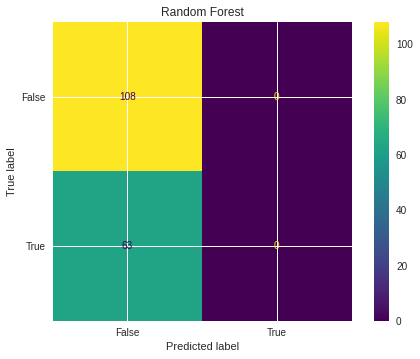

In [118]:
from sklearn.ensemble import RandomForestClassifier

import time

start = time.time()
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred_rf=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred_rf).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("F1 Score:",metrics.f1_score(y_test, y_pred_rf))
time_rf = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("Random Forest")
plt.show()

Number of mislabeled points out of a total 171 points : 13
Accuracy: 0.9239766081871345
F1 Score: 0.8976377952755906
Duration: 0.3492560386657715 seconds


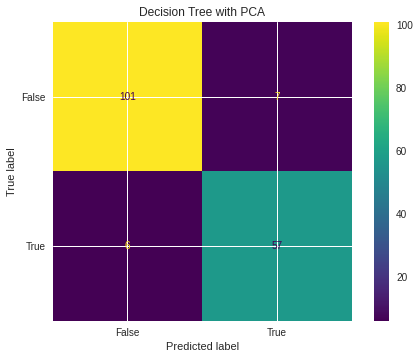

In [119]:
from sklearn.ensemble import RandomForestClassifier

import time

start = time.time()



#Create a Random forest Classifier
clf=RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_pca,y_train)

# prediction on test set
y_pred_rfpca=clf.predict(X_test_pca)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_pca.shape[0], (y_test != y_pred_rfpca).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfpca))
print("F1 Score:",metrics.f1_score(y_test, y_pred_rfpca))
time_rfpca = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rfpca)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("Decision Tree with PCA")
plt.show()

Number of mislabeled points out of a total 171 points : 6
Accuracy: 0.9649122807017544
F1 Score: 0.9538461538461538
Duration: 0.10218429565429688 seconds


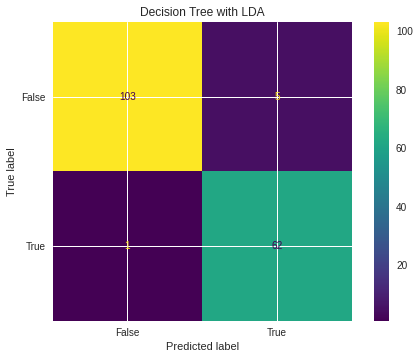

In [120]:
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()
#Create a Random forest Classifier
clf=RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth= 4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_lda,y_train)

# prediction on test set
y_pred_rflda=clf.predict(X_test_lda)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_lda.shape[0], (y_test != y_pred_rflda).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rflda))
print("F1 Score:",metrics.f1_score(y_test, y_pred_rflda))
time_rflda = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rflda)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("Decision Tree with LDA")
plt.show()

# Naive Bayes

Number of mislabeled points out of a total 171 points : 107
Accuracy: 0.3742690058479532
F1 Score: 0.5407725321888412
Duration: 0.010116338729858398 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


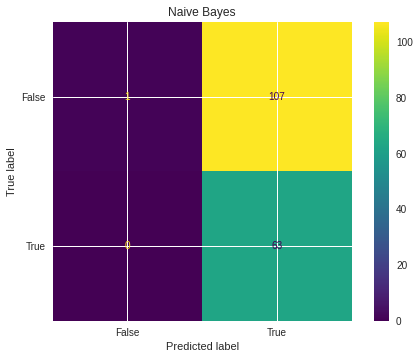

In [121]:
from sklearn.naive_bayes import GaussianNB
import time

start = time.time()

gnb = GaussianNB()

y_pred_nb = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred_nb).sum()))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nb))
print("F1 Score:",metrics.f1_score(y_test, y_pred_nb))
time_nb = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_nb)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("Naive Bayes")
plt.show()

Number of mislabeled points out of a total 171 points : 13
Accuracy: 0.9239766081871345
F1 Score: 0.894308943089431
Duration: 0.0062465667724609375 seconds


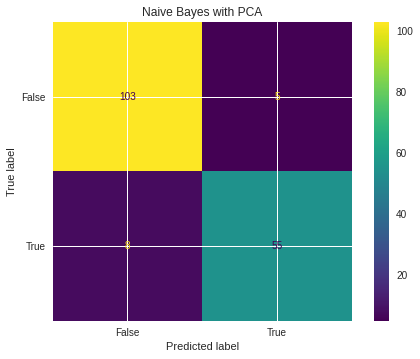

In [122]:
from sklearn.naive_bayes import GaussianNB
import time

start = time.time()

gnb = GaussianNB()

y_pred_nbpca = gnb.fit(X_train_pca, y_train).predict(X_test_pca)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_pca.shape[0], (y_test != y_pred_nbpca).sum()))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nbpca))
print("F1 Score:",metrics.f1_score(y_test, y_pred_nbpca))

time_nbpca = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_nbpca)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("Naive Bayes with PCA")
plt.show()

Number of mislabeled points out of a total 171 points : 3
Accuracy: 0.9824561403508771
F1 Score: 0.9763779527559054
Duration: 0.004866123199462891 seconds


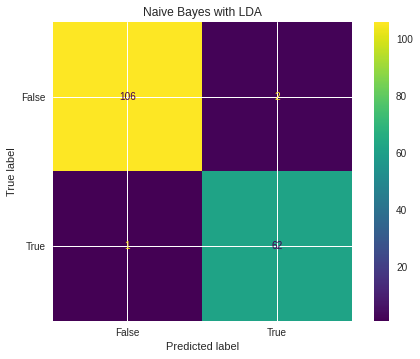

In [123]:
from sklearn.naive_bayes import GaussianNB
import time

start = time.time()

gnb = GaussianNB()

y_pred_nblda = gnb.fit(X_train_lda, y_train).predict(X_test_lda)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_lda.shape[0], (y_test != y_pred_nblda).sum()))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nblda))
print("F1 Score:",metrics.f1_score(y_test, y_pred_nblda))

time_nblda = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_nblda)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("Naive Bayes with LDA")
plt.show()

# Logistic Regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Number of mislabeled points out of a total 171 points : 85
Accuracy: 0.5029239766081871
F1 Score: 0.3703703703703703
Duration: 0.06458854675292969 seconds


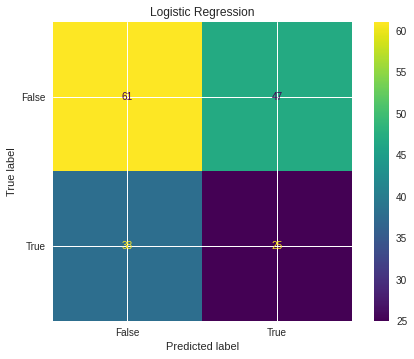

In [124]:
from sklearn.linear_model import LogisticRegression
import time

start = time.time()

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred_lr=clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred_lr).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("F1 Score:",metrics.f1_score(y_test, y_pred_lr))

time_lr = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("Logistic Regression")
plt.show()

Number of mislabeled points out of a total 171 points : 5
Accuracy: 0.9707602339181286
F1 Score: 0.96
Duration: 0.025126934051513672 seconds


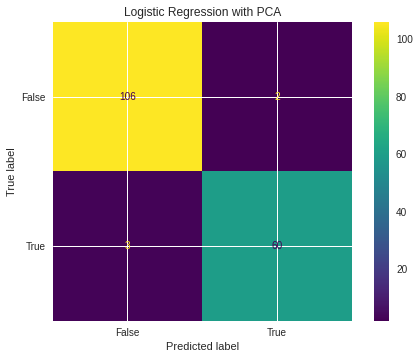

In [125]:
from sklearn.linear_model import LogisticRegression
import time

start = time.time()

clf = LogisticRegression(random_state=0).fit(X_train_pca, y_train)

y_pred_lrpca=clf.predict(X_test_pca)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_pca.shape[0], (y_test != y_pred_lrpca).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lrpca))
print("F1 Score:",metrics.f1_score(y_test, y_pred_lrpca))

time_lrpca = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lrpca)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("Logistic Regression with PCA")
plt.show()


Number of mislabeled points out of a total 171 points : 3
Accuracy: 0.9824561403508771
F1 Score: 0.9763779527559054
Duration: 0.013913631439208984 seconds


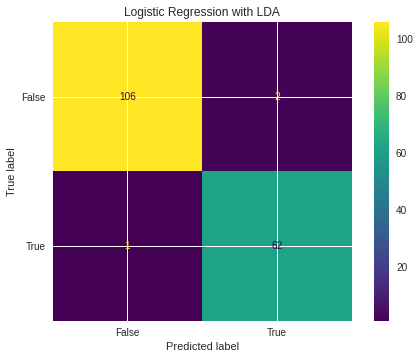

In [126]:
from sklearn.linear_model import LogisticRegression
import time

start = time.time()

clf = LogisticRegression(random_state=0).fit(X_train_lda, y_train)

y_pred_lrlda=clf.predict(X_test_lda)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_lda.shape[0], (y_test != y_pred_lrlda).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lrlda))
print("F1 Score:",metrics.f1_score(y_test, y_pred_lrlda))

time_lrlda = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lrlda)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("Logistic Regression with LDA")
plt.show()


# SVM

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Number of mislabeled points out of a total 171 points : 63
Accuracy: 0.631578947368421
F1 Score: 0.0
Duration: 0.03102421760559082 seconds
Duration: 0.031160354614257812 seconds


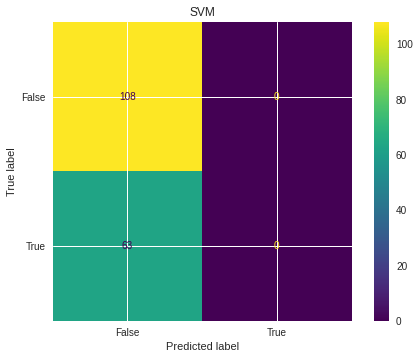

In [127]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import time

start = time.time()
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = make_pipeline( SVC(gamma='auto'))
clf.fit(X_train, y_train)

y_pred_svm=clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred_svm).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("F1 Score:",metrics.f1_score(y_test, y_pred_svm))
print('Duration: {} seconds'.format(time.time() - start))

time_svm = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("SVM")
plt.show()

Number of mislabeled points out of a total 171 points : 13
Accuracy: 0.9239766081871345
F1 Score: 0.8976377952755906
Duration: 0.03253030776977539 seconds
Duration: 0.033071279525756836 seconds


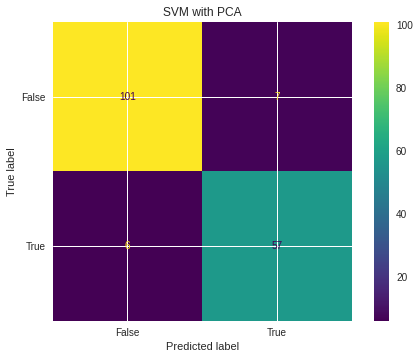

In [128]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import time

start = time.time()

# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = make_pipeline(SVC(gamma='auto'))
clf.fit(X_train_pca, y_train)

y_pred_svmpca=clf.predict(X_test_pca)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_pca.shape[0], (y_test != y_pred_svmpca).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svmpca))
print("F1 Score:",metrics.f1_score(y_test, y_pred_svmpca))
print('Duration: {} seconds'.format(time.time() - start))

time_svmpca = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svmpca)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("SVM with PCA")
plt.show()

Number of mislabeled points out of a total 171 points : 3
Accuracy: 0.9824561403508771
F1 Score: 0.9763779527559054
Duration: 0.011297941207885742 seconds
Duration: 0.011426210403442383 seconds


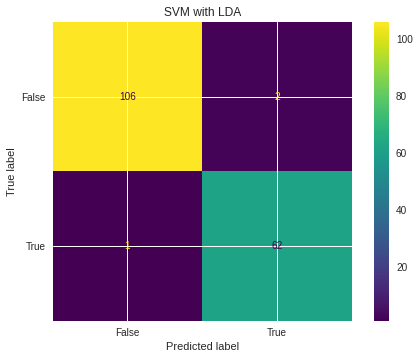

In [129]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import time

start = time.time()

# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = make_pipeline(SVC(gamma='auto'))
clf.fit(X_train_lda, y_train)

y_pred_svmlda=clf.predict(X_test_lda)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_lda.shape[0], (y_test != y_pred_svmlda).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svmlda))
print("F1 Score:",metrics.f1_score(y_test, y_pred_svmlda))
print('Duration: {} seconds'.format(time.time() - start))

time_svmlda = time.time() - start
print('Duration: {} seconds'.format(time.time() - start))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svmlda)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title("SVM with LDA")
plt.show()

# Kernel SVM

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Number of mislabeled points out of a total 171 points : 63
Accuracy: 0.631578947368421
F1 Score: 0.0


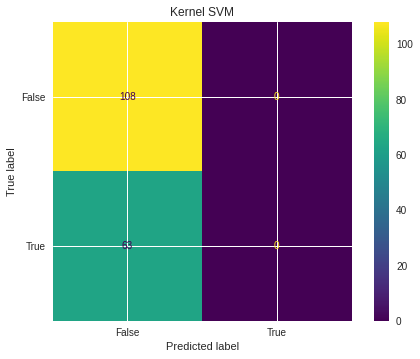

In [130]:
from sklearn import svm

# clf1 = svm.SVC(C = 1, kernel="linear",gamma=0.01)
clf1 = svm.SVC(kernel="linear",)
clf2 = svm.SVC(C = 1.5, kernel="rbf",gamma='scale')
clf3 = svm.SVC(C = 100, kernel="sigmoid",gamma=0.001)
clf4 = svm.SVC(C = 11, kernel="poly",gamma='scale')

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
clf4.fit(X_train,y_train)

y_pred_ksvm1=clf1.predict(X_test)
y_pred_ksvm2=clf2.predict(X_test)
y_pred_ksvm3=clf3.predict(X_test)
y_pred_ksvm4=clf4.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred_ksvm1).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ksvm1))
print("F1 Score:",metrics.f1_score(y_test, y_pred_ksvm1))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_ksvm1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.title('Kernel SVM')
plt.show()



Number of mislabeled points out of a total 171 points : 6
Accuracy: 0.9649122807017544
F1 Score: 0.9516129032258064


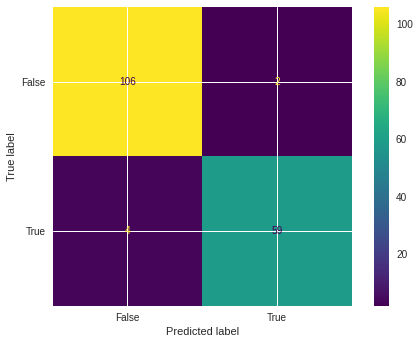

In [131]:
from sklearn import svm

clf1 = svm.SVC(C = 1, kernel="linear",gamma=0.01)
clf2 = svm.SVC(C = 1, kernel="rbf",gamma=0.01)
clf3 = svm.SVC(C = 40, kernel="sigmoid",gamma=0.001)
clf4 = svm.SVC(C = 1, kernel="poly",gamma=0.01)

clf1.fit(X_train_pca, y_train)
clf2.fit(X_train_pca, y_train)
clf3.fit(X_train_pca, y_train)
clf4.fit(X_train_pca, y_train)

y_pred_ksvmpca1=clf1.predict(X_test_pca)
y_pred_ksvmpca2=clf2.predict(X_test_pca)
y_pred_ksvmpca3=clf3.predict(X_test_pca)
y_pred_ksvmpca4=clf4.predict(X_test_pca)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_pca.shape[0], (y_test != y_pred_ksvmpca1).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ksvmpca1))
print("F1 Score:",metrics.f1_score(y_test, y_pred_ksvmpca1))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_ksvmpca1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.show()



Number of mislabeled points out of a total 171 points : 3
Accuracy: 0.9824561403508771
F1 Score: 0.9763779527559054


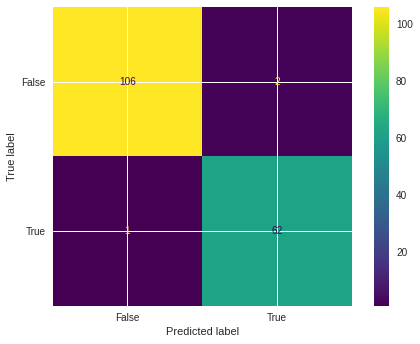

In [132]:
from sklearn import svm

clf1 = svm.SVC(C = 1, kernel="linear",gamma=0.01)
clf2 = svm.SVC(C = 1, kernel="rbf",gamma=0.01)
clf3 = svm.SVC(C = 40, kernel="sigmoid",gamma=0.001)
clf4 = svm.SVC(C = 40, kernel="poly",gamma=0.01)

clf1.fit(X_train_lda,y_train)
clf2.fit(X_train_lda,y_train)
clf3.fit(X_train_lda,y_train)
clf4.fit(X_train_lda,y_train)

y_pred_ksvmlda1=clf1.predict(X_test_lda)
y_pred_ksvmlda2=clf2.predict(X_test_lda)
y_pred_ksvmlda3=clf3.predict(X_test_lda)
y_pred_ksvmlda4=clf4.predict(X_test_lda)


print("Number of mislabeled points out of a total %d points : %d"
      % (X_test_pca.shape[0], (y_test != y_pred_ksvmlda1).sum()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ksvmlda1))
print("F1 Score:",metrics.f1_score(y_test, y_pred_ksvmlda1))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_ksvmlda1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.show()



In [133]:
# initialize list of lists
nb = metrics.f1_score(y_test, y_pred_nb)
rf = metrics.f1_score(y_test, y_pred_rf)
lr = metrics.f1_score(y_test, y_pred_lr)
svm = metrics.f1_score(y_test, y_pred_svm)
# ksvm = metrics.f1_score(y_test, y_pred_ksvm)

nbpca = metrics.f1_score(y_test, y_pred_nbpca)
rfpca = metrics.f1_score(y_test, y_pred_rfpca)
lrpca = metrics.f1_score(y_test, y_pred_lrpca)
svmpca = metrics.f1_score(y_test, y_pred_svmpca)
# ksvmpca = metrics.f1_score(y_test, y_pred_ksvmpca)

nblda = metrics.f1_score(y_test, y_pred_nblda)
rflda = metrics.f1_score(y_test, y_pred_rflda)
lrlda = metrics.f1_score(y_test, y_pred_lrlda)
svmlda = metrics.f1_score(y_test, y_pred_svmlda)
# ksvmlda = metrics.f1_score(y_test, y_pred_ksvmlda)

data = [['Naive Bayes', nb, nbpca, nblda], ['Random Forest', rf, rfpca, rflda],
        ['Logestic Regression', lr, lrpca, lrlda],['SVM', svm, svmpca, svmlda]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Method', 'F1 Score','F1 Score (Apply PCA)',
                                 'F1 Score (Apply LDA)'])
 
# print dataframe.
df

,Method,F1 Score,F1 Score (Apply PCA),F1 Score (Apply LDA)
0,Naive Bayes,0.540773,0.894309,0.976378
1,Random Forest,0.000000,0.897638,0.953846
2,Logestic Regression,0.370370,0.960000,0.976378
3,SVM,0.000000,0.897638,0.976378


In [134]:
data = [['Naive', time_nb, time_nbpca, time_nblda], ['Random Forest', time_rf, time_rfpca, time_rflda],
        ['Logestic Regression', time_lr, time_lrpca, time_lrlda],['SVM', time_svm, time_svmpca, time_svmlda]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Kernel', 'Original','PCA',
                                 'LDA'])
 
# print dataframe.
df

,Kernel,Original,PCA,LDA
0,Naive,0.010058,0.006203,0.004824
1,Random Forest,0.151985,0.349165,0.102122
2,Logestic Regression,0.064511,0.025029,0.013853
3,SVM,0.031114,0.033029,0.011387


# ROC Curve

In [135]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_rf, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_nb, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_lr, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_svm, pos_label=1)
# fpr5, tpr5, thresh5 = roc_curve(y_test, y_pred_ksvm2, pos_label=1)


# # roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [136]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred_rf)
auc_score2 = roc_auc_score(y_test, y_pred_rf)

print(auc_score1, auc_score2)

0.5 0.5


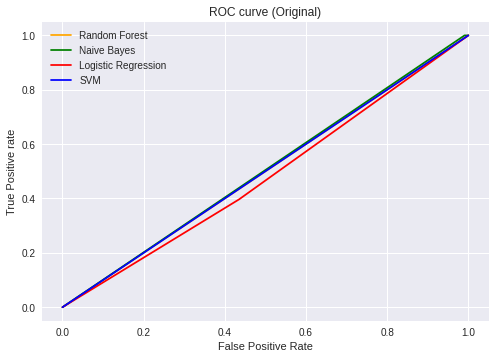

In [137]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_rf, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_nb, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_lr, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_svm, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_pred_ksvm3, pos_label=1)


y_pred_rf# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='solid',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='solid',color='green', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='solid',color='red', label='Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='solid',color='blue', label='SVM')
# plt.plot(fpr4, tpr4, linestyle='solid',color='blue', label='Kernel SVM with Sigmoid')
# title
plt.title('ROC curve (Original)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [138]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_rfpca, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_nbpca, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_lrpca, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_svmpca, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_pred_ksvmpca3, pos_label=1)




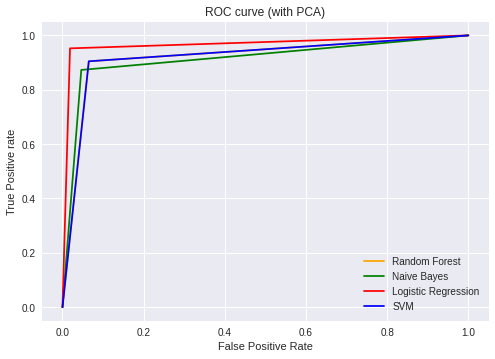

In [139]:
y_pred_rf# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='solid',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='solid',color='green', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='solid',color='red', label='Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='solid',color='blue', label='SVM')
# plt.plot(fpr4, tpr4, linestyle='solid',color='blue', label='Kernel SVM with Sigmoid')
# title
plt.title('ROC curve (with PCA)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [140]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_rflda, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_nblda, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_lrlda, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_svmlda, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_pred_ksvmlda3, pos_label=1)




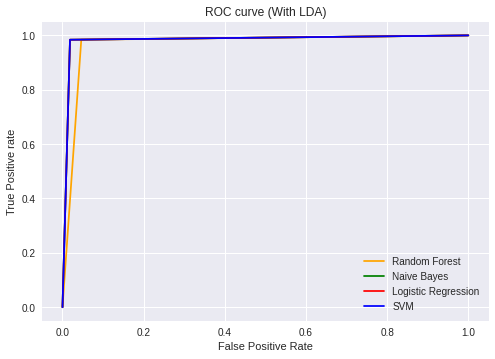

In [141]:
y_pred_rf# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='solid',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='solid',color='green', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='solid',color='red', label='Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='solid',color='blue', label='SVM')
# plt.plot(fpr4, tpr4, linestyle='solid',color='blue', label='Kernel SVM with Sigmoid')
# title
plt.title('ROC curve (With LDA)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();



# Kernel SVM

In [142]:
y_pred_ksvm1=metrics.f1_score(y_test, y_pred_ksvm1)
y_pred_ksvm2=metrics.f1_score(y_test, y_pred_ksvm2)
y_pred_ksvm3=metrics.f1_score(y_test, y_pred_ksvm3)
y_pred_ksvm4=metrics.f1_score(y_test, y_pred_ksvm4)

y_pred_ksvmpca1=metrics.f1_score(y_test, y_pred_ksvmpca1)
y_pred_ksvmpca2=metrics.f1_score(y_test, y_pred_ksvmpca2)
y_pred_ksvmpca3=metrics.f1_score(y_test, y_pred_ksvmpca3)
y_pred_ksvmpca4=metrics.f1_score(y_test, y_pred_ksvmpca4)

y_pred_ksvmlda1=metrics.f1_score(y_test, y_pred_ksvmlda1)
y_pred_ksvmlda2=metrics.f1_score(y_test, y_pred_ksvmlda2)
y_pred_ksvmlda3=metrics.f1_score(y_test, y_pred_ksvmlda3)
y_pred_ksvmlda4=metrics.f1_score(y_test, y_pred_ksvmlda4)

In [143]:
data = [['Linear', y_pred_ksvm1, y_pred_ksvmpca1, y_pred_ksvmlda1], ['RBF', y_pred_ksvm2, y_pred_ksvmpca2, y_pred_ksvmlda2],
        ['Sigmoid', y_pred_ksvm3, y_pred_ksvmpca3, y_pred_ksvmlda3],['Polynomial', y_pred_ksvm4, y_pred_ksvmpca4, y_pred_ksvmlda4]]
 
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns=['Method', 'Original','PCA',
                                 'LDA'])
 
# print dataframe.
df



,Method,Original,PCA,LDA
0,Linear,0.000000,0.951613,0.976378
1,RBF,0.000000,0.925620,0.976000
2,Sigmoid,0.916667,0.951613,0.968254
3,Polynomial,0.000000,0.568182,0.776699
